# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sachio Theodore
- **Email:** m006b4ky3997@bangkit.academy
- **ID Dicoding:** sachio_theodore

## Menentukan Pertanyaan Bisnis

- How do seasonal and weather variations affect bike usage on workdays compared to non-workdays (weekends and holidays)?
- What impact do temperature, humidity, and wind speed have on casual and registered bike users?

## Import Semua Packages/Library yang Digunakan

In [1]:
# For data manipulation and analysis
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# For data processing and clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Wrangling

### Gathering Data

This code mounts Google Drive, loads a CSV file into a DataFrame using pandas, and displays the first five rows of the dataset.

In [2]:
data = pd.read_csv('./data/hour.csv')
data.head()

Mounted at /content/drive


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


This dataset provides hourly bike-sharing data, including features like date, season, weather conditions, temperature, humidity, windspeed, and the count of casual and registered users.

### Assessing Data

- **instant**: record index
- **dteday**: date
- **season**: season (1: spring, 2: summer, 3: fall, 4: winter)
- **yr**: year (0: 2011, 1: 2012)
- **mnth**: month (1 to 12)
- **hr**: hour (0 to 23)
- **holiday**: indicates if the day is a holiday (extracted from [DCHR Holiday Schedule](http://dchr.dc.gov/page/holiday-schedule))
- **weekday**: day of the week
- **workingday**: if the day is neither a weekend nor a holiday, it is 1; otherwise, it is 0.
- **weathersit**:
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius (values divided by 41, max)
- **atemp**: Normalized feeling temperature in Celsius (values divided by 50, max)
- **hum**: Normalized humidity (values divided by 100, max)
- **windspeed**: Normalized wind speed (values divided by 67, max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes, including both casual and registered users


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


The DataFrame contains 17,379 entries and 17 columns, all with non-null values, showing data types including 12 integers, 4 floats, and 1 object, with a memory usage of 2.3+ MB.

In [4]:
data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Indicates that there are no missing values in any of the 17 columns of the DataFrame, confirming data completeness.

In [5]:
print("Number of duplicates: ", data.duplicated().sum())

Number of duplicates:  0


### Cleaning Data

In [6]:
# Drop unnecessary columns
data = data.drop(columns=['instant'])

# Replace some codes with descriptions
data['yr'] = data['yr'].replace({0: 2011, 1: 2012})
data['season'] = data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data['weathersit'] = data['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

In [7]:
# Rename columns for clarity
data.rename(columns={
    'dteday': 'date',                    # Date
    'yr': 'year',                    # Categorical: Year
    'season': 'season',              # Categorical: Season
    'mnth': 'month',                 # Categorical: Month
    'hr': 'hour',                    # Categorical: Hour
    'weekday': 'weekday',            # Categorical: Day of the week
    'workingday': 'is_working_day',      # Boolean: Working day indicator
    'holiday': 'is_holiday',             # Boolean: Holiday indicator
    'weathersit': 'weather_condition',    # Categorical: Weather situation
    'temp': 'normalized_temp',            # Numerical: Normalized temperature
    'atemp': 'normalized_feel_temp',      # Numerical: Normalized feeling temperature
    'hum': 'normalized_humidity',         # Numerical: Normalized humidity
    'windspeed': 'normalized_wind_speed', # Numerical: Normalized wind speed
    'casual': 'casual_users',            # Numerical: Count of casual users
    'registered': 'registered_users',      # Numerical: Count of registered users
    'cnt': 'total_users'                # Numerical: Total rentals
}, inplace=True)
data.head()

,date,season,year,month,hour,is_holiday,weekday,is_working_day,weather_condition,normalized_temp,normalized_feel_temp,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_users
0,2011-01-01,Spring,2011,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [8]:
data.describe(include="all")

,date,season,year,month,hour,is_holiday,weekday,is_working_day,weather_condition,normalized_temp,normalized_feel_temp,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_users
count,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,Fall,NaN,NaN,NaN,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,NaN,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,NaN,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


The dataset reveals that on average, bike usage is higher on working days compared to non-working days, with a total average of approximately 189 users per hour.

Additionally, the breakdown between casual and registered users shows that casual users average around 35.68, while registered users average significantly higher at about 153.79, highlighting the preference of registered users for bike-sharing services. This suggests that while casual users may utilize the service sporadically, registered users tend to rely on it more consistently.

In [9]:
# Calculate and display frequency for categorical columns
categories = {
    'season': data['season'].value_counts(),
    'weather_condition': data['weather_condition'].value_counts(),
    'is_working_day': data['is_working_day'].value_counts(),
    'is_holiday': data['is_holiday'].value_counts()
}

# Define function to categorize normalized temperature, humidity, and wind speed
def categorize_weather(data):
    bins_temp = [0, 0.2, 0.4, 0.6, 0.8, 1]
    labels_temp = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    data['temp_category'] = pd.cut(data['normalized_temp'], bins=bins_temp, labels=labels_temp, include_lowest=True)

    bins_humidity = [0, 0.3, 0.5, 0.7, 0.9, 1]
    labels_humidity = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    data['humidity_category'] = pd.cut(data['normalized_humidity'], bins=bins_humidity, labels=labels_humidity, include_lowest=True)

    bins_wind_speed = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
    labels_wind_speed = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    data['wind_speed_category'] = pd.cut(data['normalized_wind_speed'], bins=bins_wind_speed, labels=labels_wind_speed, include_lowest=True)
categorize_weather(data)

# Calculate frequencies for the new weather categories
weather_categories = {
    'Temperature Category': data['temp_category'].value_counts(),
    'Humidity Category': data['humidity_category'].value_counts(),
    'Wind Speed Category': data['wind_speed_category'].value_counts()
}

# Print the frequency tables with percentages
for category, counts in categories.items():
    percentages = (counts / counts.sum() * 100).round(2).astype(str) + '%'
    result = pd.DataFrame({'Frequency': counts, 'Percentage': percentages})
    print(f"\n{result}\n")

# Print the frequency tables for weather categories with percentages
for category, counts in weather_categories.items():
    percentages = (counts / counts.sum() * 100).round(2).astype(str) + '%'
    result = pd.DataFrame({'Frequency': counts, 'Percentage': percentages})
    print(f"\n{result}\n")



        Frequency Percentage
season                      
Fall         4496     25.87%
Summer       4409     25.37%
Spring       4242     24.41%
Winter       4232     24.35%


                   Frequency Percentage
weather_condition                      
Clear                  11413     65.67%
Mist                    4544     26.15%
Light Snow              1419      8.17%
Heavy Rain                 3      0.02%


                Frequency Percentage
is_working_day                      
1                   11865     68.27%
0                    5514     31.73%


            Frequency Percentage
is_holiday                      
0               16879     97.12%
1                 500      2.88%


               Frequency Percentage
temp_category                      
Low                 5357     30.82%
High                5126      29.5%
Medium              5117     29.44%
Very Low            1070      6.16%
Very High            709      4.08%


                   Frequency Percentage
hum

In [10]:
# Encode categorical columns as numbers
data_encoded = data.copy()
data_encoded['season'] = data_encoded['season'].astype('category').cat.codes
data_encoded['weather_condition'] = data_encoded['weather_condition'].astype('category').cat.codes

# Calculate correlation for relevant columns
corr_matrix_all = data_encoded[['season', 'weather_condition',
                                 'normalized_temp',
                                 'normalized_humidity', 'normalized_wind_speed',
                                 ]].corr()

# Print the correlation matrix
print("Correlation Matrix:")
corr_matrix_all

Correlation Matrix:


,season,weather_condition,normalized_temp,normalized_humidity,normalized_wind_speed
season,1.000000,0.073631,-0.361958,0.082580,-0.008939
weather_condition,0.073631,1.000000,-0.094614,0.345302,-0.019890
normalized_temp,-0.361958,-0.094614,1.000000,-0.069881,-0.023125
normalized_humidity,0.082580,0.345302,-0.069881,1.000000,-0.290105
normalized_wind_speed,-0.008939,-0.019890,-0.023125,-0.290105,1.000000


- **Season** shows a weak positive correlation with **weather_condition** (0.07) and a negative correlation with **normalized_temp** (-0.36), indicating that certain seasons may be associated with lower temperatures.
- **Weather_condition** has a moderate positive correlation with **normalized_humidity** (0.35), suggesting that higher humidity often occurs in specific weather conditions.
- **Normalized_humidity** exhibits a strong negative correlation with **normalized_wind_speed** (-0.29), indicating that higher humidity levels tend to coincide with lower wind speeds.

Overall, the correlations suggest that seasonality and weather conditions significantly impact temperature and humidity, which can influence bike usage patterns.

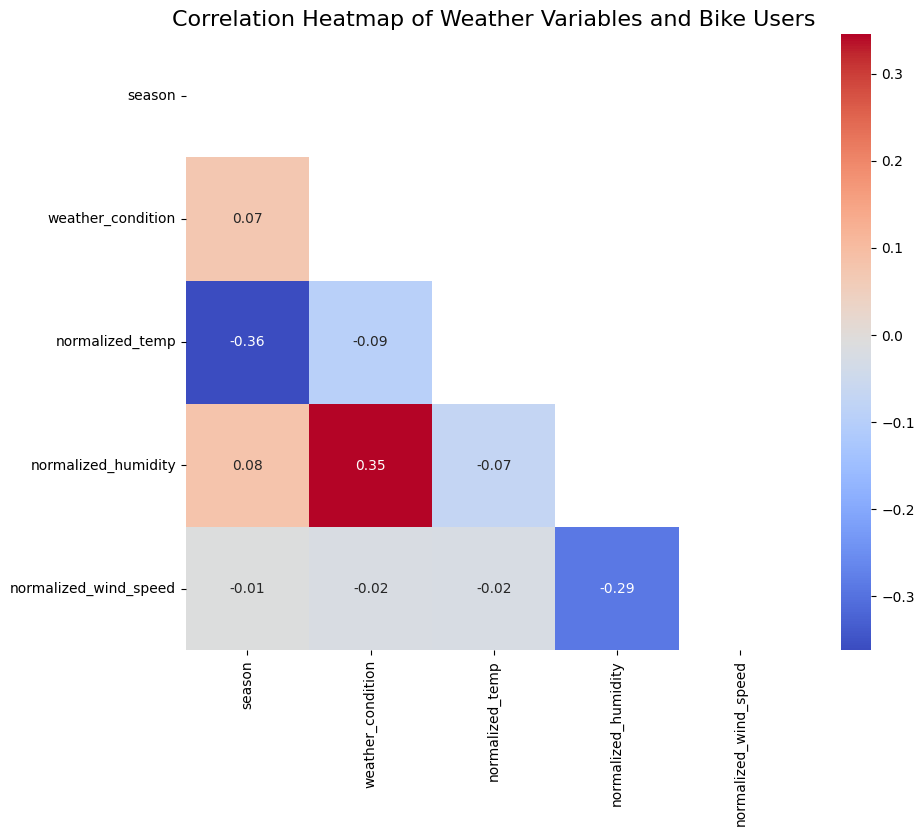

In [11]:
# Create a half triangle heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix_all, dtype=bool))  # Create mask for upper triangle
ax = sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', square=True, mask=mask)
plt.title('Correlation Heatmap of Weather Variables and Bike Users', fontsize=16)
plt.show()

### Overview of Bike Usage Data by Season, Weather Conditions, and Working Days

In [12]:
data.groupby(by=["season", "weather_condition","is_working_day"]).agg({
    "date": "nunique",
    "casual_users": "sum",
    "registered_users": "sum",
    "total_users": ["max", "min", "mean", "sum"]
})

date casual_users registered_users  \
                                        nunique          sum              sum   
season weather_condition is_working_day                                         
Fall   Clear             0                   56        82409           156546   
                         1                  127        91605           471381   
       Light Snow        0                   26         6259            11966   
                         1                   46         3468            24563   
       Mist              0                   44        18677            36199   
                         1                   96        23673           134383   
Spring Clear             0                   59        25757            78520   
                         1                  115        18705           202296   
       Heavy Rain        0                    1            1               22   
                         1                    2            7              193   
       Light Snow        0                   23          488             3812   
                         1                   52          904            16438   
       Mist              0                   46         6154            22929   
                         1                  100         8606            86516   
Summer Clear             0                   53        79178           131894   
                         1                  124        72019           381372   
       Light Snow        0                   25         2932             6948   
                         1                   66         4481            32402   
       Mist              0                   46        23583            43441   
                         1                  100        21329           119010   
Winter Clear             0                   55        55668           137247   
                         1                  111        37404           316172   
       Light Snow        0                   14         1374             7266   
                         1                   48         2877            32153   
       Mist              0                   37        14252            46747   
                         1                   98        18207           172246   

                                        total_users                          
                                                max min        mean     sum  
season weather_condition is_working_day                                      
Fall   Clear             0                      757   1  243.831633  238955  
                         1                      977   1  244.776522  562986  
       Light Snow        0                      626   1  189.843750   18225  
                         1                      891   1  162.028902   28031  
       Mist              0                      783   3  196.688172   54876  
                         1                      868   2  236.610778  158056  
Spring Clear             0                      690   1  109.649842  104277  
                         1                      801   1  128.938740  221001  
       Heavy Rain        0                       23  23   23.000000      23  
                         1                      164  36  100.000000     200  
       Light Snow        0                      166   1   42.156863    4300  
                         1                      520   1   64.951311   17342  
       Mist              0                      585   1   73.814721   29083  
                         1                      712   1  117.289766   95122  
Summer Clear             0                      730   1  238.769231  211072  
                         1                      873   1  229.565063  453391  
       Light Snow        0                      541   2   98.800000    9880  
                         1                      782   1  120.532680   36883  
       Mist              0                      660   4

In [13]:
# Grouping data by year, month, season name, and working day status
grouped = data.groupby(['year', 'month', 'season', 'is_working_day']).agg({
    'casual_users': 'sum',
    'registered_users': 'sum'
}).reset_index()

# Calculate total users for each entry
grouped['total_users'] = grouped['casual_users'] + grouped['registered_users']

# Now group again to calculate mean of total users
mean_grouped = data.groupby(['year', 'month', 'season', 'is_working_day']).agg({
    'total_users': 'mean'
}).reset_index()

# Merge the two groupings
final_grouped = grouped.merge(mean_grouped, on=['year', 'month', 'season', 'is_working_day'], suffixes=('', '_mean'))

# Unstacking to create a double header
pivot_table_season = final_grouped.set_index(['year', 'month', 'season', 'is_working_day']).unstack(level=3)

# Setting up a clean double header for user types and work status
pivot_table_season.columns = pd.MultiIndex.from_product(
    [['Casual Users', 'Registered Users', 'Total Users Sum', 'Total Users Mean'], ['Non-Work', 'Work']]
)

# Display the resulting table
print(pivot_table_season.to_string(index=True))


                  Casual Users        Registered Users         Total Users Sum         Total Users Mean            
                      Non-Work   Work         Non-Work    Work        Non-Work    Work         Non-Work        Work
year month season                                                                                                  
2011 1     Spring         1680   1393             9500   25616           11180   27009        43.166023   62.958042
     2     Spring         3623   2619            10991   30982           14614   33601        68.610329   77.066514
     3     Spring         4931   4026             7888   24361           12819   28387        90.274648   86.545732
           Summer         1453   2416             2736   16234            4189   18650        89.127660   87.558685
     4     Summer        12074  10272            19981   52543           32055   62815       133.562500  131.137787
     5     Summer        16374  14676            28095   76676          

In [14]:
# Grouping data by year, month, weather condition, and working day status
grouped_weather = data.groupby(['year', 'month', 'weather_condition', 'is_working_day']).agg({
    'casual_users': 'sum',
    'registered_users': 'sum'
}).reset_index()

# Calculate total users for each entry
grouped_weather['total_users'] = grouped_weather['casual_users'] + grouped_weather['registered_users']

# Calculate mean of total users
mean_grouped_weather = data.groupby(['year', 'month', 'weather_condition', 'is_working_day'])['total_users'].mean().reset_index()

# Merge the two groupings
final_grouped_weather = grouped_weather.merge(mean_grouped_weather, on=['year', 'month', 'weather_condition', 'is_working_day'], suffixes=('', '_mean'))

# Unstacking to create a double header
pivot_table_weather = final_grouped_weather.set_index(['year', 'month', 'weather_condition', 'is_working_day']).unstack(level=3)

# Clean double header
pivot_table_weather.columns = pd.MultiIndex.from_product(
    [['Casual Users', 'Registered Users', 'Total Users Sum', 'Total Users Mean'], ['Non-Work', 'Work']]
)

# Display the resulting table
print(pivot_table_weather.to_string(index=True))


                             Casual Users          Registered Users          Total Users Sum           Total Users Mean            
                                 Non-Work     Work         Non-Work     Work        Non-Work      Work         Non-Work        Work
year month weather_condition                                                                                                       
2011 1     Clear                    985.0    871.0           6040.0  16190.0          7025.0   17061.0        45.616883   65.872587
           Heavy Rain                 NaN      1.0              NaN     35.0             NaN      36.0              NaN   36.000000
           Light Snow                57.0     47.0            414.0   1079.0           471.0    1126.0        29.437500   34.121212
           Mist                     638.0    474.0           3046.0   8312.0          3684.0    8786.0        41.393258   64.602941
     2     Clear                   2811.0   1962.0           7690.0  20808.0

### Overview of Monthly Normalized Weather Variables and Bike Usage

In [15]:
monthly_grouped = data.groupby(['year', 'month']).agg({
    'normalized_temp': 'mean',
    'normalized_humidity': 'mean',
    'normalized_wind_speed': 'mean',
    'casual_users': 'sum',
    'registered_users': 'sum'
})
monthly_grouped

normalized_temp  normalized_humidity  normalized_wind_speed  \
year month                                                                
2011 1             0.197413             0.574055               0.197485   
     2             0.283975             0.559707               0.229451   
     3             0.331233             0.570055               0.232225   
     4             0.471015             0.668220               0.244105   
     5             0.577231             0.713360               0.181274   
     6             0.693083             0.593250               0.178195   
     7             0.758575             0.589664               0.171667   
     8             0.705554             0.625622               0.188112   
     9             0.612915             0.783821               0.152757   
     10            0.469879             0.706541               0.175594   
     11            0.402197             0.675216               0.181000   
     12            0.325290             0.649528               0.167791   
2012 1             0.275007             0.587314               0.216897   
     2             0.315434             0.574249               0.203310   
     3             0.449529             0.607712               0.212978   
     4             0.469025             0.507897               0.224528   
     5             0.612366             0.664556               0.184703   
     6             0.675111             0.558361               0.192644   
     7             0.752366             0.606089               0.160450   
     8             0.711801             0.648629               0.155116   
     9             0.620083             0.645375               0.178901   
     10            0.505339             0.671596               0.168062   
     11            0.336156             0.574805               0.186532   
     12            0.323046             0.682682               0.185346   

            casual_users  registered_users  
year month                                  
2011 1              3073             35116  
     2              6242             41973  
     3             12826             51219  
     4             22346             72524  
     5             31050            104771  
     6             30612            112900  
     7             36452            104889  
     8             28842            107849  
     9             26545            100873  
     10            25222             98289  
     11            15594             86573  
     12             8448             78875  
2012 1              8969             87775  
     2              8721             94416  
     3             31618            133257  
     4             38456            135768  
     5             44235            151630  
     6             43294            159536  
     7             41705            161902  
     8             43197            171306  
     9             43778            174795  
     10            34538            164303  
     11            21009            131655  
     12            13245            110468

## Visualization & Explanatory Analysis

### Pertanyaan 1: How do seasonal and weather variations affect bike usage on workdays compared to non-workdays (weekends and holidays)?

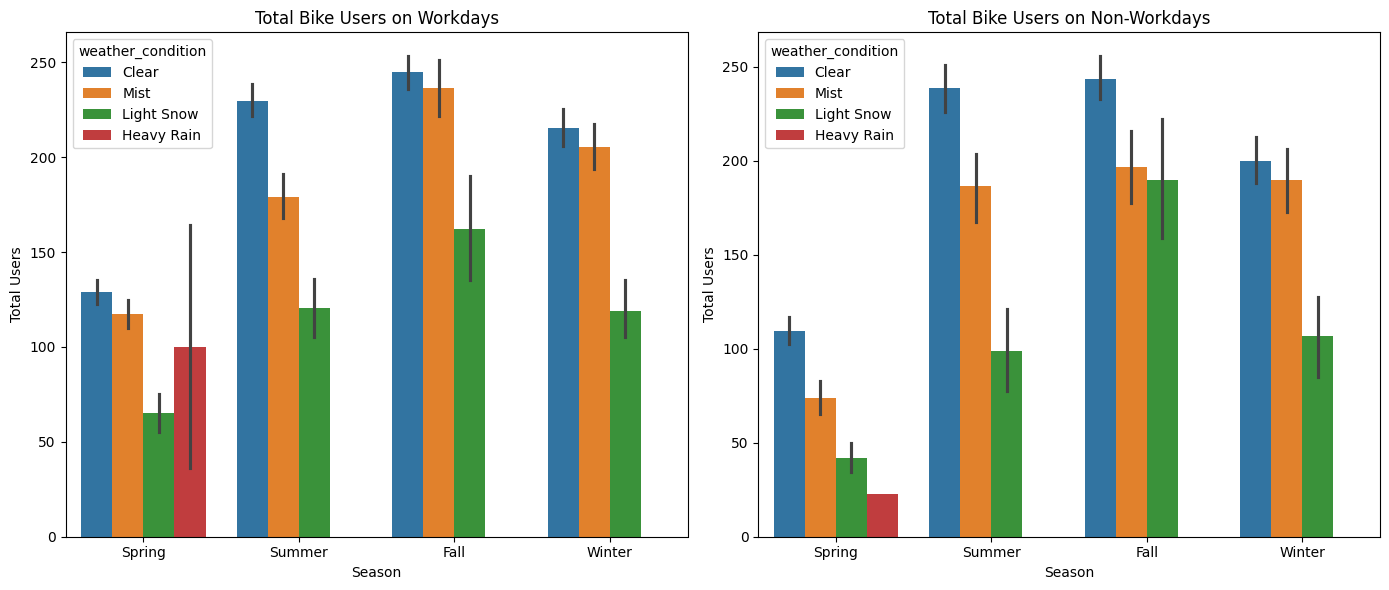

In [16]:
workdays = data[data['is_working_day'] == 1]
non_workdays = data[data['is_working_day'] == 0]

workday_stats = workdays.groupby(['season', 'weather_condition'])['total_users'].describe()
non_workday_stats = non_workdays.groupby(['season', 'weather_condition'])['total_users'].describe()

plt.figure(figsize=(14, 6))

# Workdays
plt.subplot(1, 2, 1)
sns.barplot(x='season', y='total_users', hue='weather_condition', data=workdays)
plt.title('Total Bike Users on Workdays')
plt.ylabel('Total Users')
plt.xlabel('Season')

# Non-workdays
plt.subplot(1, 2, 2)
sns.barplot(x='season', y='total_users', hue='weather_condition', data=non_workdays)
plt.title('Total Bike Users on Non-Workdays')
plt.ylabel('Total Users')
plt.xlabel('Season')

plt.tight_layout()
plt.show()


The analysis of bicycle users reveals significant trends influenced by season, weather conditions, and whether it’s a working day or holiday. In Fall, registered users peak, particularly on working days with clear weather, reaching up to 156,546 total users. Summer also demonstrates high user engagement, especially during clear conditions. Conversely, Light Snow and Mist result in lower user numbers, although some cyclists still participate. It’s evident that clear weather is a major driver of cycling, with total users exceeding 450,000 in optimal conditions. The data also indicates a clear distinction between working days and holidays; working days see a higher number of registered users, suggesting that cycling is often used for commuting. During holidays, while casual users increase, total numbers remain lower than on working days, indicating a more structured approach to cycling during those times. Overall, favorable weather and weekdays are crucial for driving bicycle usage, with seasonal variations further influencing participation.

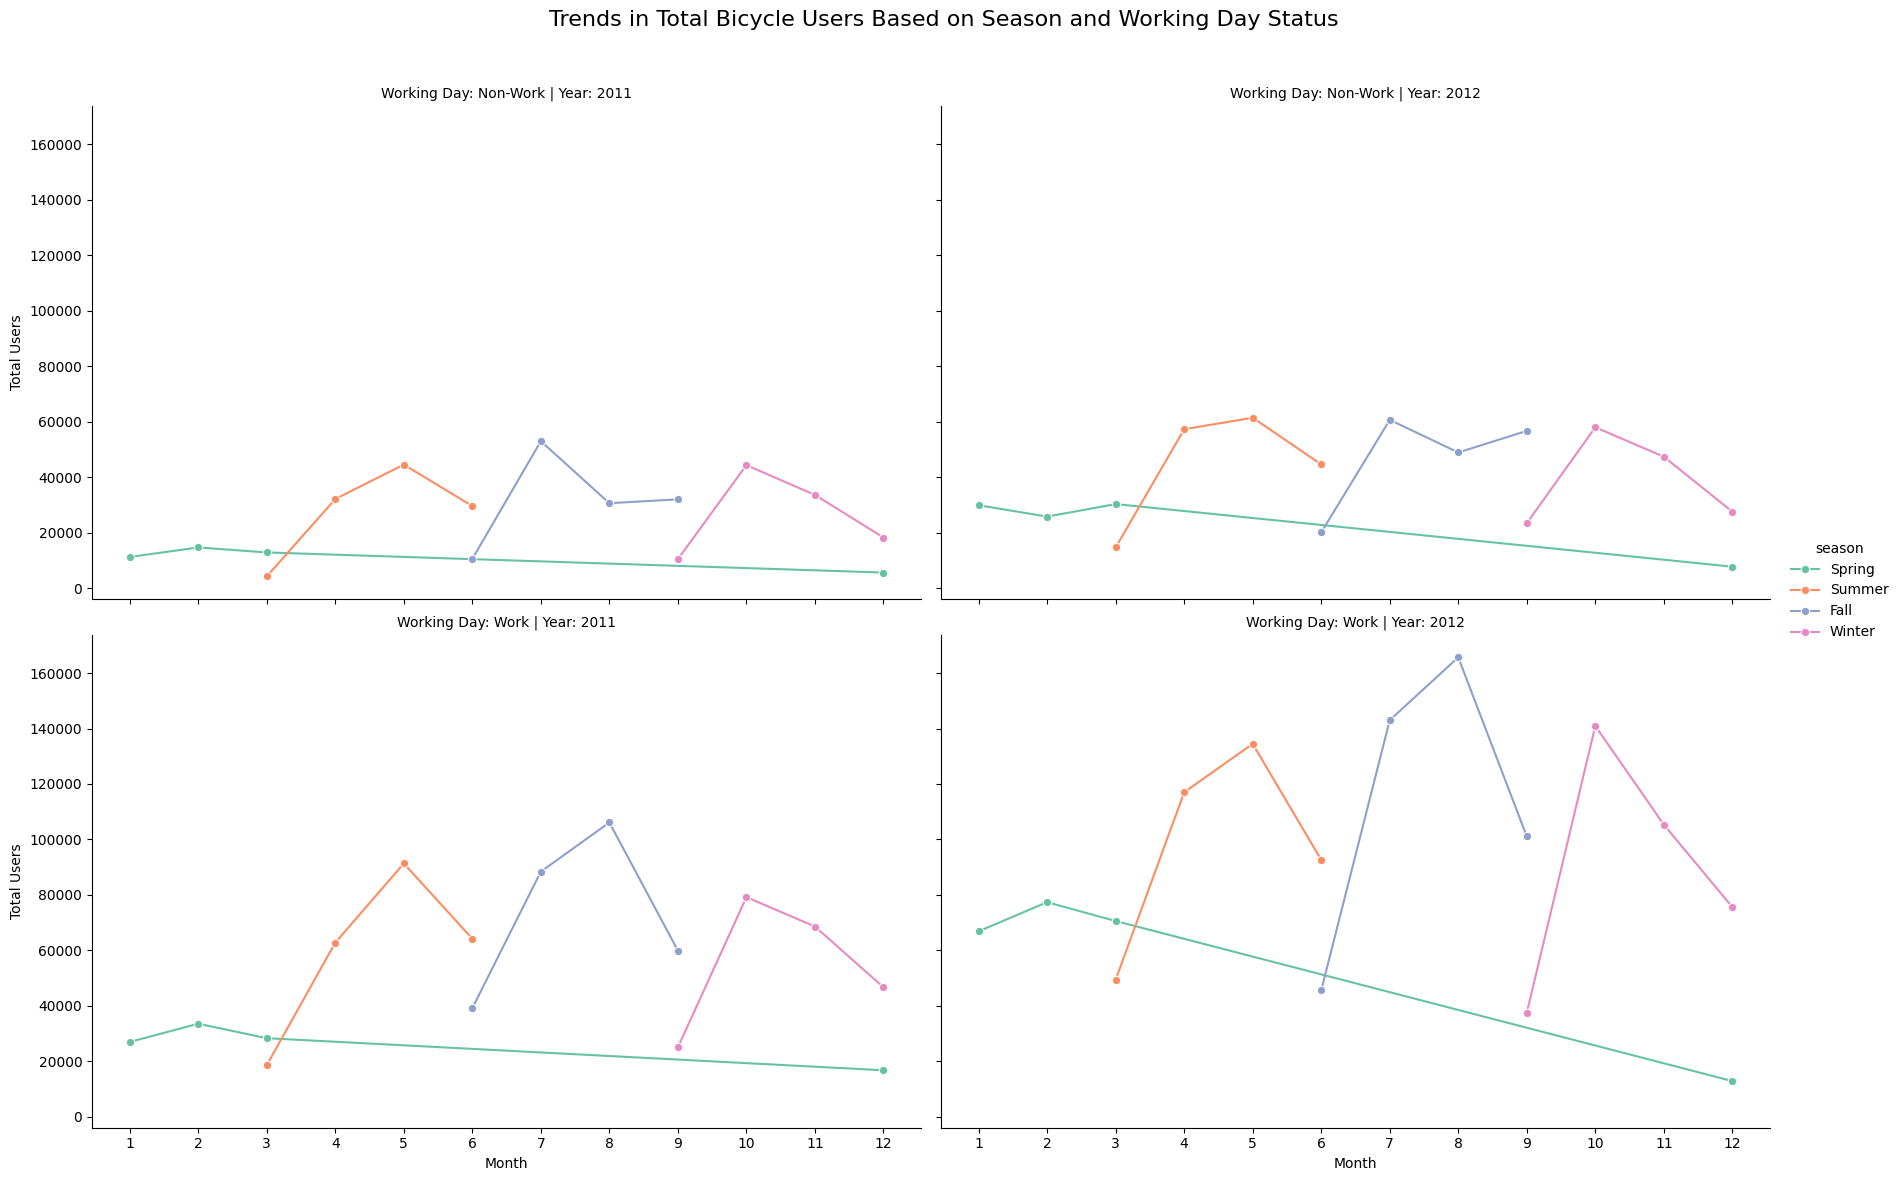

In [17]:
# Set Pivot for season
pivot_data_season = pivot_table_season.stack().reset_index()
pivot_data_season.columns = ['year', 'month', 'season', 'is_working_day', 'Casual Users', 'Registered Users', 'Total Users Sum', 'Total Users Mean']
pivot_data_season = pivot_data_season.sort_values(['year', 'month'])
pivot_data_season = pivot_data_season[pivot_data_season['Total Users Sum'].notna()]

# Add visual elements
g_season = sns.FacetGrid(pivot_data_season, col='year', row='is_working_day', hue='season', height=6, aspect=1.5, palette='Set2')
g_season.map(sns.lineplot, 'month', 'Total Users Sum', marker='o', drawstyle='default')
g_season.add_legend()
g_season.set_axis_labels('Month', 'Total Users')
g_season.set_titles(row_template='Working Day: {row_name}', col_template='Year: {col_name}')

for ax in g_season.axes.flatten():
    ax.set_xticks(range(1, 13))  # Set ticks for months 1 to 12
    ax.set_xticklabels(range(1, 13))  # Set labels for months

g_season.fig.suptitle('Trends in Total Bicycle Users Based on Season and Working Day Status', fontsize=16)
g_season.fig.subplots_adjust(top=0.9)

plt.show()


This analysis focuses on bicycle user statistics for the years 2011 and 2012, separating the data to highlight seasonal trends within each year. In **2011**, the data reveals a clear pattern of engagement across the seasons, with **Fall** consistently showing the highest number of users. For instance, casual users peaked during this season, especially on non-working days, indicating a strong preference for cycling in cooler weather.

In **2012**, this pattern persists, with both casual and registered users demonstrating similar engagement levels throughout the seasons. Notably, both years exhibit a pronounced increase in activity during the fall, suggesting that external factors, such as weather and seasonal events, may influence cycling behavior similarly across these years.

Furthermore, the analysis shows that workdays and non-workdays exhibit comparable trends, with user engagement remaining high during weekends while declining during the week. This consistency across both years underscores the reliability of seasonal cycling habits, providing valuable insights for city planners and cycling advocates aiming to promote year-round cycling participation. By understanding these patterns, stakeholders can better strategize initiatives to encourage cycling in all seasons.

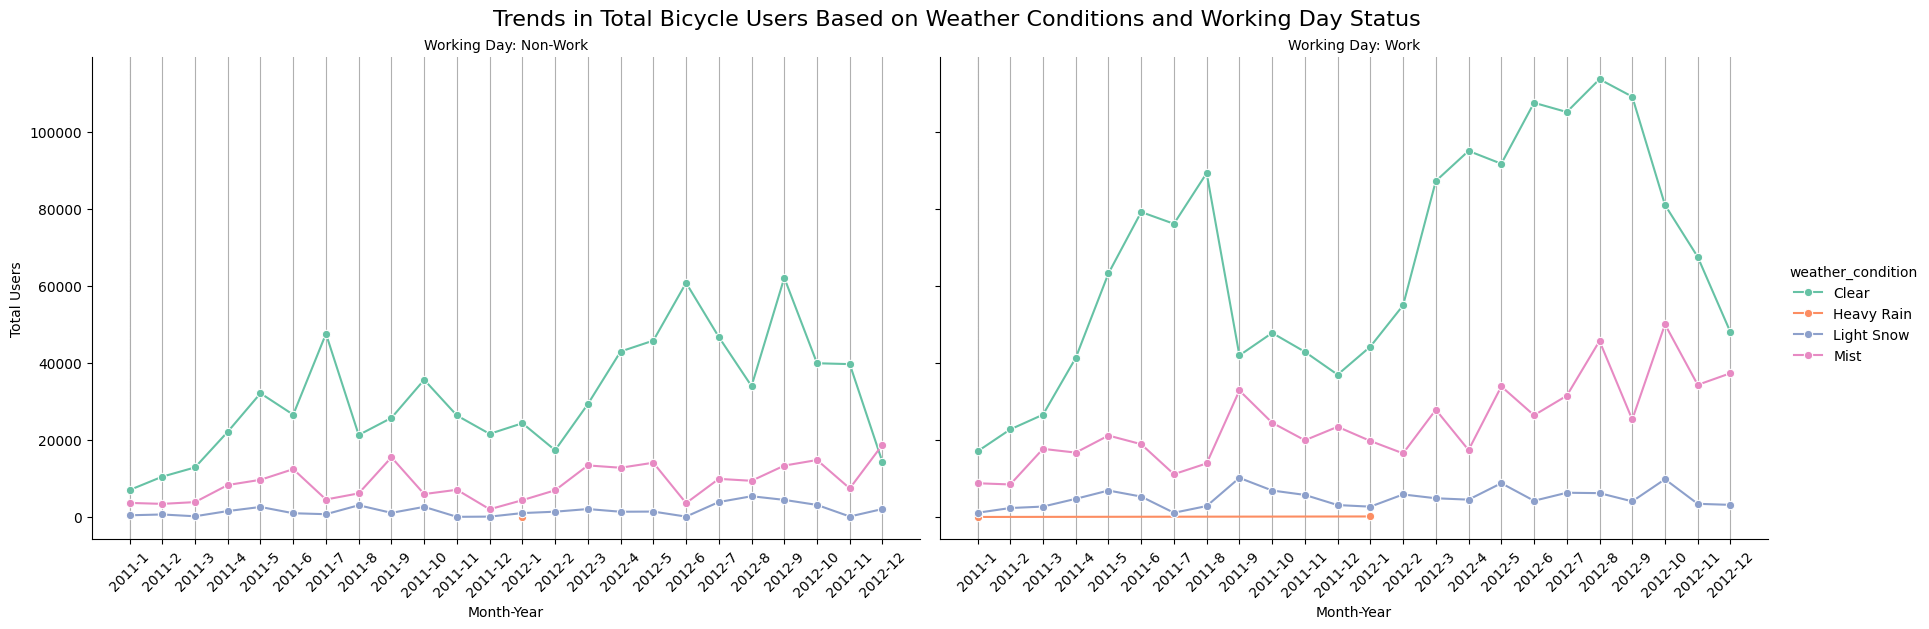

In [18]:
# Set Pivot for Weather
pivot_data = pivot_table_weather.stack().reset_index()
pivot_data.columns = ['year', 'month', 'weather_condition', 'is_working_day', 'Casual Users', 'Registered Users', 'Total Users Sum', 'Total Users Mean']
pivot_data['year_month'] = pivot_data['year'].astype(str) + '-' + pivot_data['month'].astype(str)

# Add visual elements
g = sns.FacetGrid(pivot_data, col='is_working_day', hue='weather_condition', height=6, aspect=1.5, palette='Set2')
g.map(sns.lineplot, 'year_month', 'Total Users Sum', marker='o')
g.add_legend()
g.set_axis_labels('Month-Year', 'Total Users')
g.set_titles('Working Day: {col_name}')
g.set_xticklabels(rotation=45)
g.fig.suptitle('Trends in Total Bicycle Users Based on Weather Conditions and Working Day Status', fontsize=16)

for ax in g.axes.flatten():
    ax.grid(axis='x')  # Add vertical gridlines
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=0.1)

g.fig.subplots_adjust(top=0.9)
plt.show()


The analysis of user engagement in 2011 and 2012 reveals a clear pattern related to weather conditions, where misty weather can be disregarded due to its rarity in both years. Overall, the engagement patterns on both workdays and non-workdays show that clear weather consistently results in the highest number of users, followed by heavy rain and light snow.

Clear weather accounts for the highest user participation, indicating that users are more active during favorable conditions. On workdays, this number is even higher, suggesting that positive environmental factors significantly boost user involvement. Conversely, heavy rain also shows an increase in user numbers, albeit not as high as during clear weather. This suggests that, despite adverse conditions, some users remain interested in participating.

In contrast, light snow displays a more linear engagement pattern. User numbers under these conditions remain stable without significant spikes, indicating that light snow may not be compelling enough to drive active participation. This differs from the noticeable fluctuations observed during clear and heavy rain conditions.

Thus, it is evident that user engagement is heavily influenced by weather conditions. To maximize participation, platforms could focus promotional efforts during clear weather, while alternative strategies may be necessary during adverse conditions, particularly heavy rain and light snow.

### Pertanyaan 2: What impact do temperature, humidity, and wind speed have on casual and registered bike users?

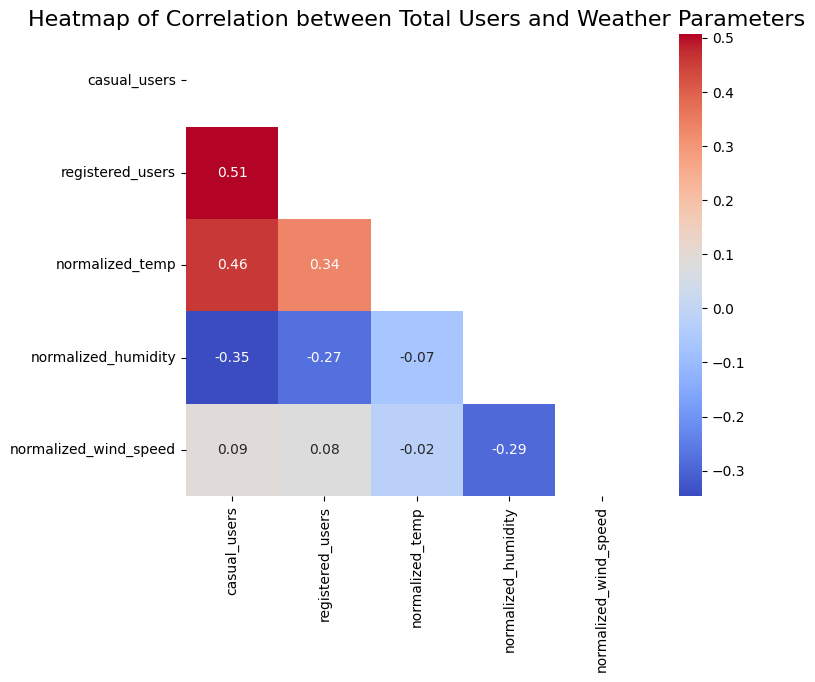

In [19]:
correlation_data = data[['casual_users', 'registered_users', 'normalized_temp', 'normalized_humidity', 'normalized_wind_speed']]
corr_matrix = correlation_data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap visualization
plt.figure(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Correlation between Total Users and Weather Parameters', fontsize=16)
plt.show()

The correlation matrix shows important relationships affecting bike usage. There’s a moderate positive correlation between casual and registered users, meaning when one group increases, the other tends to do the same. Warmer temperatures are positively linked to both user types, encouraging more cycling. In contrast, higher humidity negatively impacts participation for both casual and registered users. Wind speed has minimal effect on bike usage. Overall, temperature is a key factor promoting cycling, while humidity acts as a deterrent, offering valuable insights for promoting biking under favorable conditions.

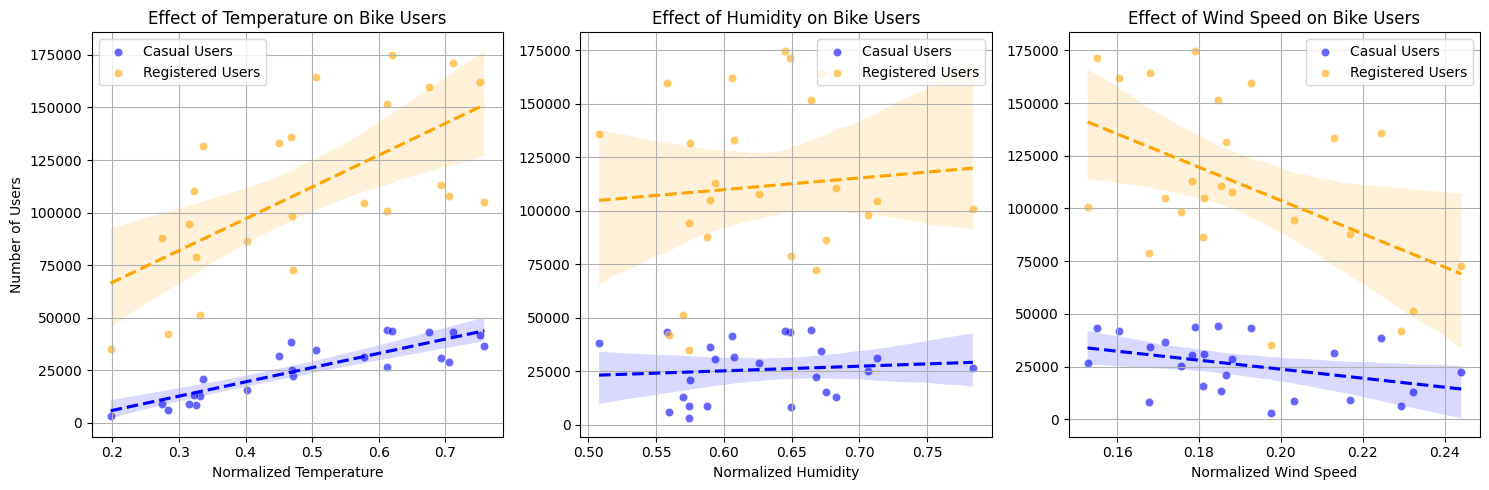

In [20]:
plt.figure(figsize=(15, 5))

# Scatter plot for temperature vs users
plt.subplot(1, 3, 1)
sns.scatterplot(data=monthly_grouped, x='normalized_temp', y='casual_users', label='Casual Users', color='blue', alpha=0.6)
sns.scatterplot(data=monthly_grouped, x='normalized_temp', y='registered_users', label='Registered Users', color='orange', alpha=0.6)
sns.regplot(data=monthly_grouped, x='normalized_temp', y='casual_users', scatter=False, color='blue', line_kws={'linestyle':'--'})
sns.regplot(data=monthly_grouped, x='normalized_temp', y='registered_users', scatter=False, color='orange', line_kws={'linestyle':'--'})
plt.title('Effect of Temperature on Bike Users')
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of Users')
plt.grid(True)
plt.legend()

# Scatter plot for humidity vs users
plt.subplot(1, 3, 2)
sns.scatterplot(data=monthly_grouped, x='normalized_humidity', y='casual_users', label='Casual Users', color='blue', alpha=0.6)
sns.scatterplot(data=monthly_grouped, x='normalized_humidity', y='registered_users', label='Registered Users', color='orange', alpha=0.6)
sns.regplot(data=monthly_grouped, x='normalized_humidity', y='casual_users', scatter=False, color='blue', line_kws={'linestyle':'--'})
sns.regplot(data=monthly_grouped, x='normalized_humidity', y='registered_users', scatter=False, color='orange', line_kws={'linestyle':'--'})
plt.title('Effect of Humidity on Bike Users')
plt.xlabel('Normalized Humidity')
plt.ylabel('')
plt.grid(True)
plt.legend()

# Scatter plot for wind speed vs users
plt.subplot(1, 3, 3)
sns.scatterplot(data=monthly_grouped, x='normalized_wind_speed', y='casual_users', label='Casual Users', color='blue', alpha=0.6)
sns.scatterplot(data=monthly_grouped, x='normalized_wind_speed', y='registered_users', label='Registered Users', color='orange', alpha=0.6)
sns.regplot(data=monthly_grouped, x='normalized_wind_speed', y='casual_users', scatter=False, color='blue', line_kws={'linestyle':'--'})
sns.regplot(data=monthly_grouped, x='normalized_wind_speed', y='registered_users', scatter=False, color='orange', line_kws={'linestyle':'--'})
plt.title('Effect of Wind Speed on Bike Users')
plt.xlabel('Normalized Wind Speed')
plt.ylabel('')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
X = monthly_grouped[['normalized_temp', 'normalized_humidity', 'normalized_wind_speed']]
y_casual = monthly_grouped['casual_users']
y_registered = monthly_grouped['registered_users']

X_train, X_test, y_train_casual, y_test_casual = train_test_split(X, y_casual, test_size=0.2, random_state=42)
X_train, X_test, y_train_registered, y_test_registered = train_test_split(X, y_registered, test_size=0.2, random_state=42)

model_casual = LinearRegression().fit(X_train, y_train_casual)
model_registered = LinearRegression().fit(X_train, y_train_registered)

y_pred_train_casual = model_casual.predict(X_train)
y_pred_test_casual = model_casual.predict(X_test)

y_pred_train_registered = model_registered.predict(X_train)
y_pred_test_registered = model_registered.predict(X_test)

# Calculate the MSE dan R-squared
mse_train_casual = mean_squared_error(y_train_casual, y_pred_train_casual)
mse_test_casual = mean_squared_error(y_test_casual, y_pred_test_casual)

mse_train_registered = mean_squared_error(y_train_registered, y_pred_train_registered)
mse_test_registered = mean_squared_error(y_test_registered, y_pred_test_registered)

print(f'Casual Users - Train MSE: {mse_train_casual}, Test MSE: {mse_test_casual}')
print(f'Registered Users - Train MSE: {mse_train_registered}, Test MSE: {mse_test_registered}')


Casual Users - Train MSE: 43148472.036335394, Test MSE: 49276743.817467645
Registered Users - Train MSE: 731032332.6478711, Test MSE: 1646552431.97751


The analysis of bike usage data from 2011 and 2012 reveals distinct relationships between weather conditions and user engagement. For temperature, both casual and registered users show a positive linear trend, indicating that higher temperatures correlate with increased bike usage. This trend is particularly strong in the warmer months, as evident from the monthly data.

In contrast, humidity presents a nearly linear relationship with user numbers; while there is a slight positive trend, it does not strongly support increased cycling as humidity rises, suggesting that users are less likely to bike in more humid conditions.

Wind speed, however, demonstrates a negative linear relationship with both user types, indicating that higher wind speeds deter bike usage. This is consistent with the understanding that adverse weather conditions can negatively impact outdoor activities.

Despite these observations, the models do not exhibit robust fits, as reflected in the Mean Squared Error (MSE) values. The train and test MSE for casual users (43148472 and 49276743, respectively) and registered users (731032332 and 1646552432) suggest that the models may struggle to generalize effectively. These values indicate that while trends can be observed, the variability in user engagement due to other unmeasured factors likely affects the predictive capability of the models.

Overall, the data highlights the importance of temperature in driving bike usage while also emphasizing the negative impact of wind speed and the ambiguous effect of humidity.

## K-Means Clustering Analysis of Bicycle Usage Based on Temperature and Humidity (Opsional)

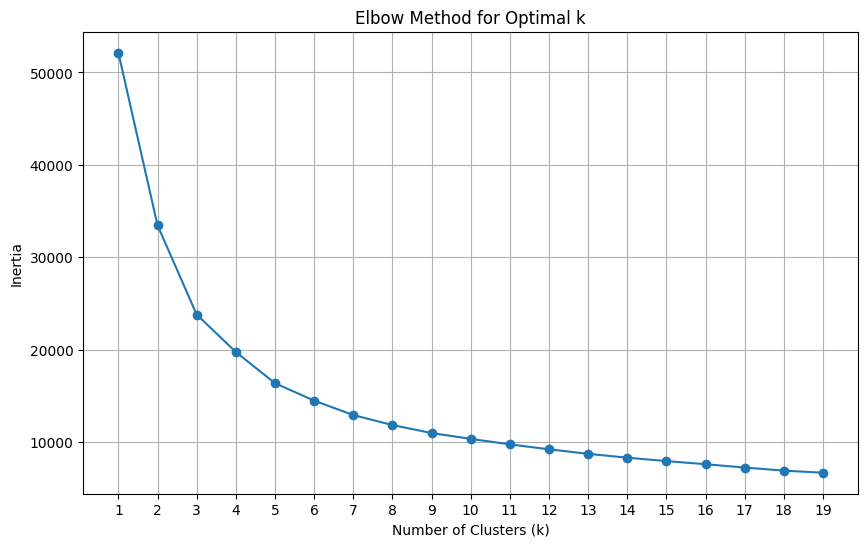

In [22]:
features = data[['normalized_temp', 'normalized_humidity', 'total_users']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Range of cluster numbers to be tested
range_n_clusters = range(1, 20)
inertia_values = []

# Calculate inertia for each number of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plotting the inertia results
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()


The optimal number of clusters (k) is 3, as indicated by the elbow method in the plot.

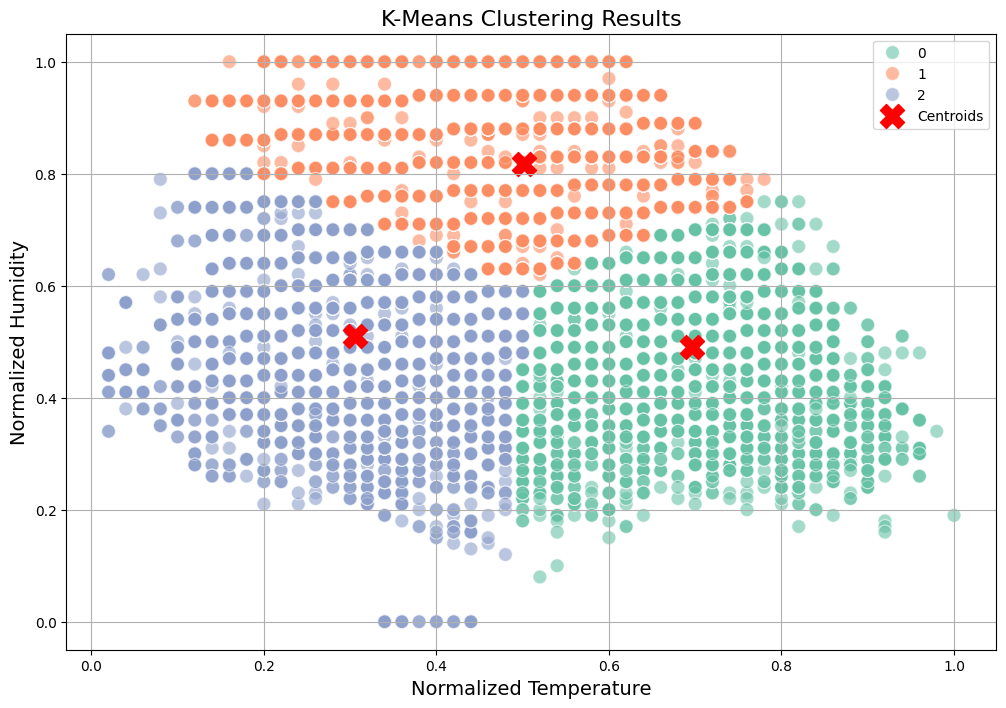

In [23]:
# Initialize KMeans with the specified k and n_init
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Train the model
data['cluster'] = kmeans.fit_predict(data[['normalized_temp', 'normalized_humidity']])

feature_x = 'normalized_temp'
feature_y = 'normalized_humidity'

# Scatter plot for each cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x=feature_x, y=feature_y, hue='cluster', palette='Set2', alpha=0.6, s=100)

# Add centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

# Add other visual elements
plt.title('K-Means Clustering Results', fontsize=16)
plt.xlabel('Normalized Temperature', fontsize=14)
plt.ylabel('Normalized Humidity', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


The visualization of the K-Means clustering results indicates that the centroids are located at approximately (0.2, 0.5), (0.7, 0.5), and (0.5, 0.8). The first centroid at (0.2, 0.5) suggests a cluster of users who are likely cycling in lower temperature and moderate humidity conditions. This group may represent casual cyclists who prefer more comfortable, cooler weather.

The second centroid at (0.7, 0.5) indicates a cluster with higher temperatures but similar humidity levels, suggesting that these users are more active in warmer conditions, likely representing registered users who are more committed to cycling regardless of the humidity.

Finally, the third centroid at (0.5, 0.8) reflects a cluster where users cycle in moderate temperatures with high humidity, potentially capturing those who cycle despite less favorable conditions, perhaps indicating resilience or necessity. Overall, these clusters provide valuable insights into how different temperature and humidity levels influence cycling behavior among different user groups.

## Conclusion

- The analysis of bicycle usage in 2011 and 2012 reveals that seasonal and weather variations significantly influence user engagement, particularly between workdays and non-workdays. Fall consistently emerges as the peak season, especially on clear weather workdays, where user counts can exceed 156,000. Clear weather is a major driver of participation, with total users surpassing 450,000 in optimal conditions, while heavy rain attracts some users, albeit less than clear conditions. Conversely, light snow and mist result in lower engagement. Workdays show higher registered user counts, indicating that cycling is primarily used for commuting, whereas casual use rises during holidays, though overall participation remains lower. This underscores the importance of favorable weather and weekdays in driving cycling activity, providing insights for initiatives to promote cycling year-round.
- The analysis of bike usage in relation to temperature, humidity, and wind speed reveals that warmer temperatures significantly boost cycling for both casual and registered users, while higher humidity discourages participation. Wind speed also negatively impacts bike usage, although its effect is less pronounced. Despite these clear trends, the predictive models show variability, as indicated by the Mean Squared Error (MSE) values. Overall, temperature is the key driver of cycling activity, highlighting the need for targeted initiatives to promote biking during favorable weather and address the challenges posed by humidity and wind.